In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pylab as plt

In [12]:
#read the data
df_train = pd.read_csv("train_comoutliers.csv")

print(df_train.head())
print(df_train.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [13]:
#view the data types of each colum
print(df_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [14]:
#Type 'object' is a string for pandas which poses problems with machine learning algorithms
# #If we want to use these as features, we'll need to convert these to number representations.
#Get some basic information on the DataFrame:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#We can see that Age, Cabin, and Embarked are missing values, Cabin has too many missing values,
# whereas we might be able to infer values for Age as Embarked
#Now we are goimg to Generate various descriptive statistics on the DataFrame:
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.839174    0.523008   
std     257.353842    0.486592    0.836071   15.031655    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000  133.000000    8.000000   

            Parch         Fare  
count  891.000000   891.000000  
mean     0.381594    37.234698  
std      0.806057   173.359298  
min      0.000000   -10.100000  
25%      0.000000     7.910400  
50%      0.000000    14.454200  
75%      0.000000    31.000000  
max      6.000000  5012.329200  


In [16]:

#Vamos agora remover os nulos

##Lista as colunas e marca as que possuem algum valor nulo
print(df_train.isnull().any())
print()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool



In [17]:
# Na informação básica da dataframe, podemos ver o número de valores não nulos de cada coluna.
print(df_train.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [18]:
# vamos simplesmente remover a coluna de nossos dados.
#Obs. essa á a opção apenas para exercitar as possibilidades de forma didática.
# Vários algoritmos podem beneficiar da informação da cabine, mesmo com poucos exemplos.
## Cria um novo dataframe (df_train2) sem a coluna Cabin
df_train2 = df_train.drop("Cabin", axis=1)
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


29.839173669467783
28.0


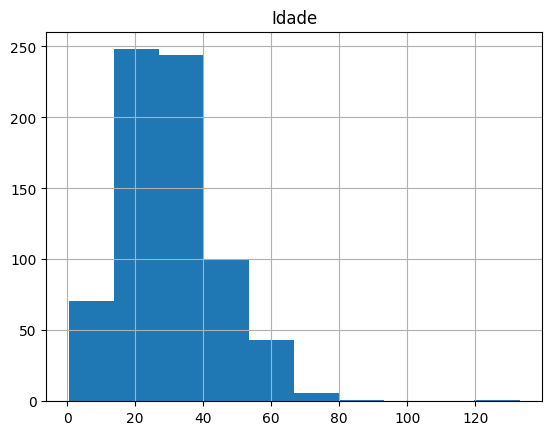

In [19]:
#Agora vamos analisar a coluna idade. Temos duas opções:

#Trocar nulo por um valor (média ou mediana)
#Ignorar
# A segunda opção limita o uso de alguns algoritmos, mas a primeira também tem os seus problemas.
# Vamos analisar a primeira opção e para isso vamos calcular a média e a mediana das idades
# e ver o histograma dos dados originais.

media_idade = df_train2["Age"].mean()
mediana_idade = df_train2["Age"].median()

print(media_idade)
print(mediana_idade)

df_train2["Age"].hist()
plt.title("Idade")
plt.show()

C:\Users\barbo\AppData\Local\Temp\ipykernel_9508\396115903.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2["Age"].fillna(media_idade, inplace=True) ## O inplace altera no próprio dataframe em vez de termos de criar outro


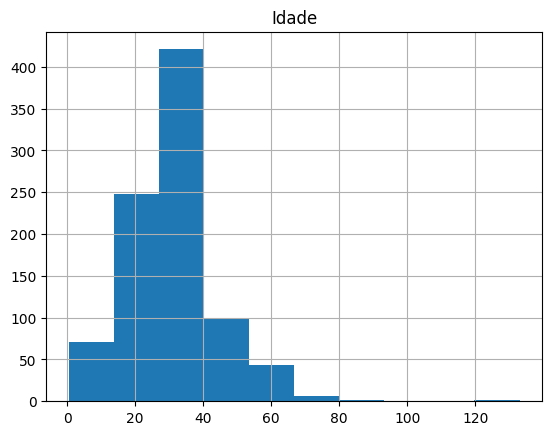

In [20]:
#Como a média e mediana são muito próximos, a diferença será mínima. Então, vamos trocar os nulos pela média e depois gerar novo histograma de idades.

## preenche os nulos com a média das idades
df_train2["Age"].fillna(media_idade, inplace=True) ## O inplace altera no próprio dataframe em vez de termos de criar outro
df_train2["Age"].hist()
plt.title("Idade")
plt.show()

In [21]:
#Como podemos ver, o formato do histograma modifica-se completamente, mas essa será nossa opção para essa coluna.
# Por último vamos analisar a coluna Embarked, que tem poucos calores nulos. Vamos gerar um histograma:
# histograma só é possivel com valores numéricos, mas Embarked é categórico
print(df_train2.groupby("Embarked")["PassengerId"].count()) #group by porto de embarque - número de passageiros por porto de embarque

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


In [22]:
#Como podemos ver nos dados resultantes, a maioria dos passageiros embarcaram no porto de Southampton (S),
# então vamos, nesse caso, atribuir os valores em falta para o valor mais comum:
df_train2["Embarked"].fillna("S", inplace=True)
print(df_train2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


C:\Users\barbo\AppData\Local\Temp\ipykernel_9508\724755275.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train2["Embarked"].fillna("S", inplace=True)


In [23]:
#Agora nossos dados não contêm nulos. Vamos salvá-los para recuperar posteriormente
df_train2.to_csv("train_no_nulls.csv", index=False)